In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tools.numdiff import approx_hess1, approx_hess2, approx_hess3
import pandas as pd

In [2]:
import pytensor
import pytensor.tensor as pt
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [3]:
import pytensor.tensor as at

In [4]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.2


In [5]:
class BetaRV(at.random.op.RandomVariable):
    name = "beta"
    ndim_supp = 0
    ndims_params = []
    dtype = "floatX"

    @classmethod
    def rng_fn(cls, rng, size):
        raise NotImplementedError("Cannot sample from beta variable")


beta = BetaRV()

In [6]:
class Beta(pm.Continuous):
    rv_op = beta

    @classmethod
    def dist(cls, mu=0, **kwargs):
        mu = at.as_tensor_variable(mu)
        return super().dist([mu], **kwargs)

    def logp(self, value):
        mu = self.mu
        return beta_logp(value - mu)


def beta_logp(value):
    return -1.5 * at.log(1 + (value) ** 2)


with pm.Model() as model:
    beta = Beta("beta", mu=0)

In [7]:
pytensor.dprint(beta)

beta_rv{0, (), floatX, False}.1 [id A] 'beta'
 |RandomGeneratorSharedVariable(<Generator(PCG64) at 0x2CF13869380>) [id B]
 |TensorConstant{[]} [id C]
 |TensorConstant{11} [id D]
 |TensorConstant{0} [id E]


In [9]:
pm.draw(deta)

NameError: name 'deta' is not defined

TypeError: BetaRV.rng_fn() takes 3 positional arguments but 4 were given
Apply node that caused the error: beta_rv{0, (), floatX, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x2CF1399C3C0>), TensorConstant{[]}, TensorConstant{11}, TensorConstant{0})
Toposort index: 0
Inputs types: [RandomGeneratorType, TensorType(int64, (0,)), TensorType(int64, ()), TensorType(int8, ())]
Inputs shapes: ['No shapes', (0,), (), ()]
Inputs strides: ['No strides', (0,), (), ()]
Inputs values: [Generator(PCG64) at 0x2CF1399C3C0, array([], dtype=int64), array(11, dtype=int64), array(0, dtype=int8)]
Outputs clients: [['output'], ['output']]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

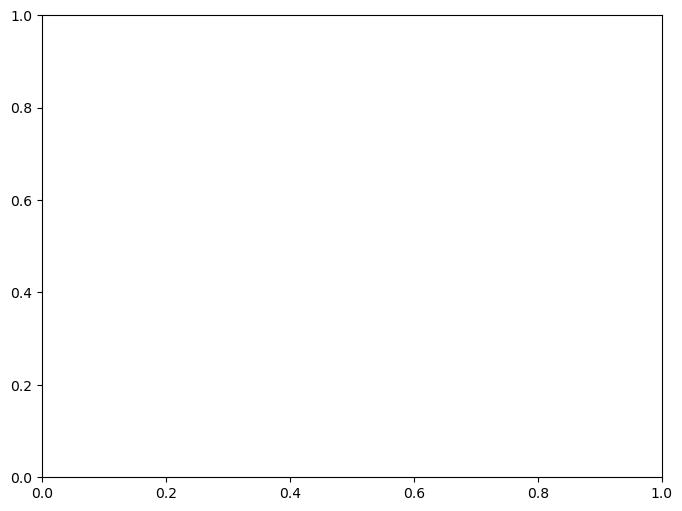

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(pm.draw(beta, draws=1_000), color="C1", bins=15)
ax.set(title="Samples from a normal distribution using pymc", ylabel="count");